In [2]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 13.2 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed

In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [19]:
def AlexNet(ipx,classes):
  AlexNet = Sequential()
  #1st Convolutional Layer
  AlexNet.add(Conv2D(filters=96, input_shape=ipx, kernel_size=(11,11), strides=(4,4), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
  #2nd Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #3rd Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #4th Convolutional Layer
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))

  #5th Convolutional Layer
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

  #Passing it to a Fully Connected layer
  AlexNet.add(Flatten())
  # 1st Fully Connected Layer
  AlexNet.add(Dense(4096, input_shape=ipx))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  AlexNet.add(Dropout(0.4))

  #2nd Fully Connected Layer
  AlexNet.add(Dense(4096))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout
  AlexNet.add(Dropout(0.4))

  #3rd Fully Connected Layer
  AlexNet.add(Dense(1000))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('relu'))
  #Add Dropout
  AlexNet.add(Dropout(0.4))

  #Output Layer
  AlexNet.add(Dense(classes))
  AlexNet.add(BatchNormalization())
  AlexNet.add(Activation('softmax'))

  return AlexNet

In [20]:
def plot(AlexNet) : 
  import matplotlib.pyplot as plt
  #Plotting the training and validation loss

  f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

  #Assigning the first subplot to graph training loss and validation loss
  ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
  ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')
  ax[0].set_title("loos vs val_loss")

  #Plotting the training accuracy and validation accuracy
  ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
  ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')
  ax[1].set_title("acc vs val_acc")

  plt.legend()

### IMPORTING CATS_DOGS

In [14]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-19 15:17:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   100MB/s    in 0.7s    

2022-08-19 15:17:46 (100 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



##### Extracting dataset

In [15]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [18]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [19]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [20]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.376.jpg', 'cat.34.jpg', 'cat.533.jpg', 'cat.863.jpg', 'cat.104.jpg', 'cat.63.jpg', 'cat.815.jpg', 'cat.996.jpg', 'cat.430.jpg', 'cat.656.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


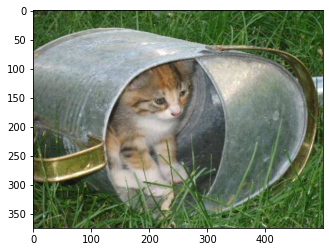

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

In [22]:
ipx = (224,224,3)
classes = 2
Alexnet2 = AlexNet(ipx,classes)

In [23]:
Alexnet2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 96)       384       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 256)     

In [24]:
Alexnet2.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [25]:
history2 = Alexnet2.fit(train_generator,steps_per_epoch = 100,epochs=10,validation_data = validation_generator,validation_steps = 50,verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 113ms/step - loss: 0.7069 - accuracy: 0.5615 - val_loss: 1.0139 - val_accuracy: 0.4990
Epoch 2/10
100/100 [==============================] - 11s 109ms/step - loss: 0.6374 - accuracy: 0.6435 - val_loss: 0.7580 - val_accuracy: 0.6010
Epoch 3/10
100/100 [==============================] - 11s 109ms/step - loss: 0.6170 - accuracy: 0.6600 - val_loss: 0.7177 - val_accuracy: 0.5530
Epoch 4/10
100/100 [==============================] - 11s 109ms/step - loss: 0.5823 - accuracy: 0.7040 - val_loss: 1.0448 - val_accuracy: 0.5640
Epoch 5/10
100/100 [==============================] - 11s 109ms/step - loss: 0.5622 - accuracy: 0.7095 - val_loss: 0.6292 - val_accuracy: 0.6730
Epoch 6/10
100/100 [==============================] - 11s 109ms/step - loss: 0.5347 - accuracy: 0.7385 - val_loss: 0.7352 - val_accuracy: 0.5980
Epoch 7/10
100/100 [==============================] - 11s 110ms/step - loss: 0.5173 - accuracy: 0.7500 - val_loss: 1.0971 - val_ac

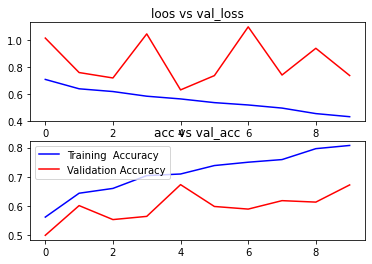

In [26]:
plot(Alexnet2)

### Making functions for tranfer learning models 

In [25]:
#Importing all the model libraries
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.mobilenet_v2 import MobileNetV2

In [26]:
def plot_mod(model):
  plot_model(model,  show_shapes=True, show_layer_names=True)
def plot(model) : 
  import matplotlib.pyplot as plt
  #Plotting the training and validation loss

  f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

  #Assigning the first subplot to graph training loss and validation loss
  ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
  ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')
  ax[0].set_title("loos vs val_loss")

  #Plotting the training accuracy and validation accuracy
  ax[1].plot(model.history.history['acc'],color='b',label='Training  Accuracy')
  ax[1].plot(model.history.history['val_acc'],color='r',label='Validation Accuracy')
  ax[1].set_title("acc vs val_acc")

  plt.legend()
  
# VGG16
def vgg16_model():
  base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  # base_model.summary()
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

def model_fit(model):
  history = model.fit(
  train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)
  
  return history

#Googlenet
def google_model():
  base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model
  
#RESnet
def res_model():
  base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

#EfficientnetB0
def eff_model():
  base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

#Mobilenet
def mobile_model():
  base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
  base_model.trainable = False #freeze the layers
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
  ])
  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
  return model

## Import VGG16 model

In [30]:
model = vgg16_model()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
history = model_fit(model)

Epoch 1/5
100/100 [==============================] - 20s 174ms/step - loss: 0.4745 - acc: 0.7780 - val_loss: 0.3396 - val_acc: 0.8720
Epoch 2/5
100/100 [==============================] - 17s 174ms/step - loss: 0.2804 - acc: 0.9015 - val_loss: 0.2703 - val_acc: 0.8980
Epoch 3/5
100/100 [==============================] - 18s 175ms/step - loss: 0.2210 - acc: 0.9265 - val_loss: 0.2465 - val_acc: 0.9040
Epoch 4/5
100/100 [==============================] - 18s 178ms/step - loss: 0.1903 - acc: 0.9370 - val_loss: 0.2315 - val_acc: 0.9120
Epoch 5/5
100/100 [==============================] - 20s 198ms/step - loss: 0.1659 - acc: 0.9465 - val_loss: 0.2392 - val_acc: 0.8910


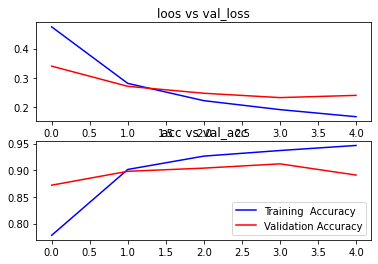

In [43]:
plot(model)

### Import GoogleNet

In [55]:
model = google_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 51200)             0         
                                                                 
 dense_11 (Dense)            (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [47]:
history = model_fit(model)

Epoch 1/5
100/100 [==============================] - 17s 172ms/step - loss: 0.0096 - acc: 0.9975 - val_loss: 0.0639 - val_acc: 0.9800
Epoch 2/5
100/100 [==============================] - 12s 120ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0662 - val_acc: 0.9840
Epoch 3/5
100/100 [==============================] - 12s 120ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9850
Epoch 4/5
100/100 [==============================] - 12s 120ms/step - loss: 9.0655e-04 - acc: 1.0000 - val_loss: 0.0585 - val_acc: 0.9840
Epoch 5/5
100/100 [==============================] - 13s 127ms/step - loss: 7.0600e-04 - acc: 1.0000 - val_loss: 0.0583 - val_acc: 0.9850


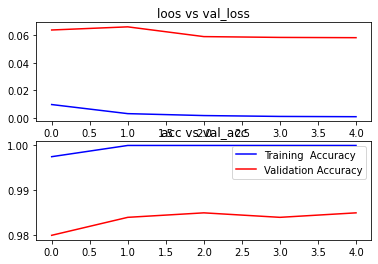

In [48]:
plot(model)

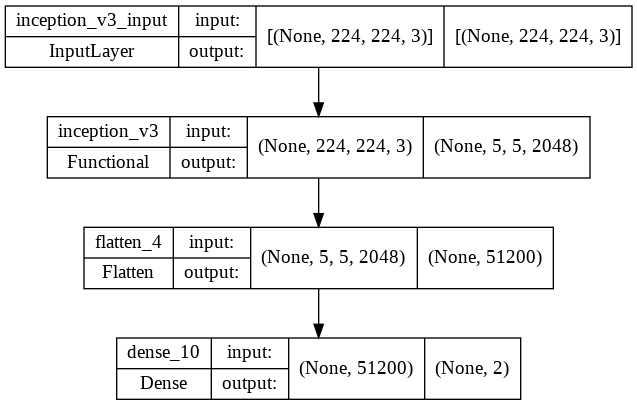

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

### Import ResNet 50

In [56]:
model=res_model()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_6 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [57]:
history = model_fit(model)

Epoch 1/5
100/100 [==============================] - 21s 169ms/step - loss: 0.6983 - acc: 0.5685 - val_loss: 0.7314 - val_acc: 0.5220
Epoch 2/5
100/100 [==============================] - 13s 132ms/step - loss: 0.6544 - acc: 0.6315 - val_loss: 0.6510 - val_acc: 0.6140
Epoch 3/5
100/100 [==============================] - 14s 139ms/step - loss: 0.6588 - acc: 0.6230 - val_loss: 0.7023 - val_acc: 0.5710
Epoch 4/5
100/100 [==============================] - 13s 131ms/step - loss: 0.6035 - acc: 0.6560 - val_loss: 0.6064 - val_acc: 0.6730
Epoch 5/5
100/100 [==============================] - 13s 132ms/step - loss: 0.5888 - acc: 0.6810 - val_loss: 0.6680 - val_acc: 0.6230


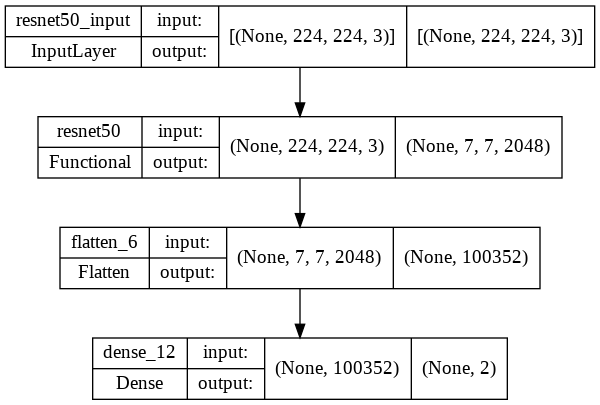

In [58]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

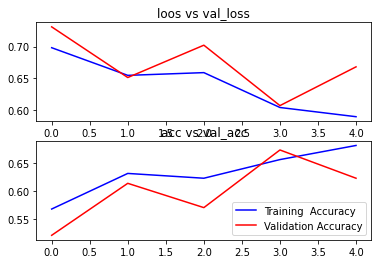

In [59]:
plot(model)

### Import EfficientNetB0

In [60]:
model = eff_model()

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_13 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [61]:
history = model_fit(model)

Epoch 1/5
100/100 [==============================] - 20s 125ms/step - loss: 0.7606 - acc: 0.5115 - val_loss: 0.6974 - val_acc: 0.5000
Epoch 2/5
100/100 [==============================] - 11s 114ms/step - loss: 0.7712 - acc: 0.5060 - val_loss: 0.7818 - val_acc: 0.5000
Epoch 3/5
100/100 [==============================] - 12s 116ms/step - loss: 0.7336 - acc: 0.4960 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 4/5
100/100 [==============================] - 11s 113ms/step - loss: 0.7332 - acc: 0.4995 - val_loss: 0.8050 - val_acc: 0.5000
Epoch 5/5
100/100 [==============================] - 11s 115ms/step - loss: 0.7304 - acc: 0.5150 - val_loss: 0.7287 - val_acc: 0.5000


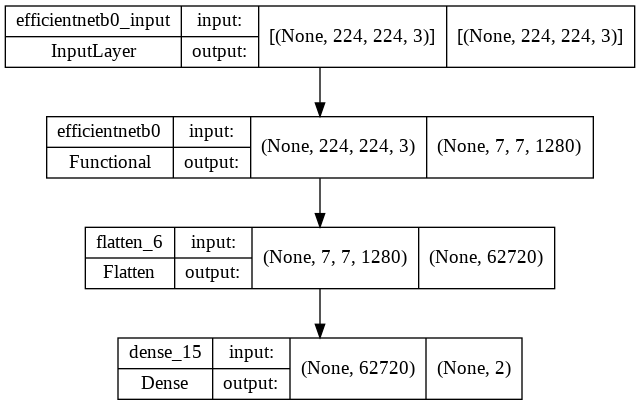

In [ ]:
plot_model(model,  show_shapes=True, show_layer_names=True)

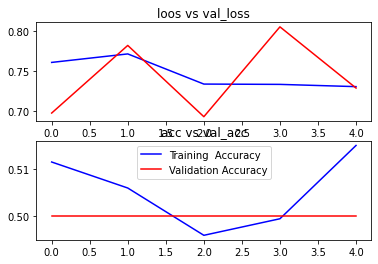

In [62]:
plot(model)

### Import Mobilenet V2


In [63]:
model = mobile_model()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_8 (Flatten)         (None, 62720)             0         
                                                                 
 dense_14 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [64]:
history = model_fit(model)

Epoch 1/5
100/100 [==============================] - 16s 116ms/step - loss: 0.1359 - acc: 0.9505 - val_loss: 0.0949 - val_acc: 0.9750
Epoch 2/5
100/100 [==============================] - 11s 110ms/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.1001 - val_acc: 0.9740
Epoch 3/5
100/100 [==============================] - 11s 109ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0909 - val_acc: 0.9780
Epoch 4/5
100/100 [==============================] - 11s 109ms/step - loss: 6.2889e-04 - acc: 1.0000 - val_loss: 0.0906 - val_acc: 0.9770
Epoch 5/5
100/100 [==============================] - 11s 109ms/step - loss: 4.5525e-04 - acc: 1.0000 - val_loss: 0.0906 - val_acc: 0.9770


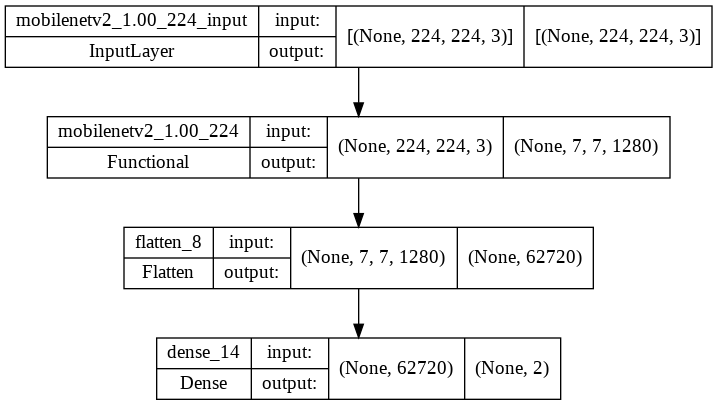

In [65]:
plot_model(model,  show_shapes=True, show_layer_names=True)

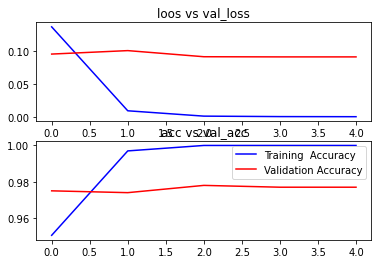

In [66]:
plot(model)

# Importing horse2zebra

In [4]:
!wget --no-check-certificate \
    https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip \
    -O /tmp/horse_zebra.zip

--2022-08-19 17:10:44--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘/tmp/horse_zebra.zip’

/tmp/horse_zebra.zi 100%[===================>] 111.45M  75.7MB/s    in 1.5s    

2022-08-19 17:10:45 (75.7 MB/s) - ‘/tmp/horse_zebra.zip’ saved [116867962/116867962]



In [5]:
import os
import zipfile

local_zip = '/tmp/horse_zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
base_dir = '/tmp/horse2zebra'
!mkdir /tmp/horse2zebra/train
!mkdir /tmp/horse2zebra/test
!mv /tmp/horse2zebra/trainA /tmp/horse2zebra/train
!mv /tmp/horse2zebra/trainB /tmp/horse2zebra/train
!mv /tmp/horse2zebra/testA /tmp/horse2zebra/test
!mv /tmp/horse2zebra/testB /tmp/horse2zebra/test
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_horse_dir = os.path.join(train_dir, 'trainA')

# Directory with our training dog pictures
train_zebra_dir = os.path.join(train_dir, 'trainB')

# Directory with our validation cat pictures
validation_horse_dir = os.path.join(validation_dir, 'testA')

# Directory with our validation dog pictures
validation_zebradir = os.path.join(validation_dir, 'testB')

mkdir: cannot create directory ‘/tmp/horse2zebra/train’: File exists
mkdir: cannot create directory ‘/tmp/horse2zebra/test’: File exists
mv: cannot stat '/tmp/horse2zebra/trainA': No such file or directory
mv: cannot stat '/tmp/horse2zebra/trainB': No such file or directory
mv: cannot stat '/tmp/horse2zebra/testA': No such file or directory


In [13]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [14]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [15]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_3363.jpg', 'n02381460_671.jpg', 'n02381460_1051.jpg', 'n02381460_1666.jpg', 'n02381460_3946.jpg', 'n02381460_1525.jpg', 'n02381460_1132.jpg', 'n02381460_5167.jpg', 'n02381460_2968.jpg', 'n02381460_1687.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


# Alexnet on horse2zebra

In [21]:
ipx = (224,224,3)
classes = 2
Alexnet3 = AlexNet(ipx,classes)
Alexnet3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1

In [22]:
Alexnet3.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [45]:
history3 = Alexnet3.fit(train_generator,steps_per_epoch = 100,epochs=10,validation_data = validation_generator,validation_batch_size = 30,verbose=1)

Epoch 1/10
100/100 [==============================] - 8s 80ms/step - loss: 0.0880 - accuracy: 0.9758 - val_loss: 0.2756 - val_accuracy: 0.8923
Epoch 2/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0823 - accuracy: 0.9753 - val_loss: 0.2352 - val_accuracy: 0.8923
Epoch 3/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0980 - accuracy: 0.9697 - val_loss: 0.8507 - val_accuracy: 0.7231
Epoch 4/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0606 - accuracy: 0.9835 - val_loss: 0.2289 - val_accuracy: 0.9038
Epoch 5/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0745 - accuracy: 0.9788 - val_loss: 0.5050 - val_accuracy: 0.8385
Epoch 6/10
100/100 [==============================] - 7s 70ms/step - loss: 0.0848 - accuracy: 0.9732 - val_loss: 0.2385 - val_accuracy: 0.9115
Epoch 7/10
100/100 [==============================] - 7s 71ms/step - loss: 0.0615 - accuracy: 0.9830 - val_loss: 0.3658 - val_accuracy: 0.8462

KeyError: ignored

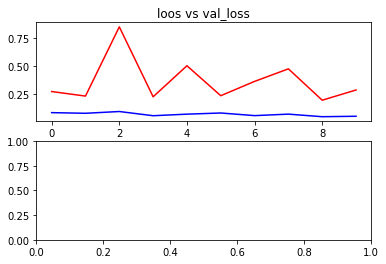

In [46]:
plot(Alexnet3)

## VGG16

In [47]:
model = vgg16_model()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [48]:

history = model.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 17s 162ms/step - loss: 0.3357 - acc: 0.8571 - val_loss: 0.1894 - val_acc: 0.9231
Epoch 2/5
100/100 [==============================] - 17s 165ms/step - loss: 0.1665 - acc: 0.9500 - val_loss: 0.1443 - val_acc: 0.9654
Epoch 3/5
100/100 [==============================] - 15s 148ms/step - loss: 0.1209 - acc: 0.9667 - val_loss: 0.1264 - val_acc: 0.9538
Epoch 4/5
100/100 [==============================] - 15s 150ms/step - loss: 0.1077 - acc: 0.9692 - val_loss: 0.1135 - val_acc: 0.9538
Epoch 5/5
100/100 [==============================] - 15s 154ms/step - loss: 0.0859 - acc: 0.9788 - val_loss: 0.1079 - val_acc: 0.9577


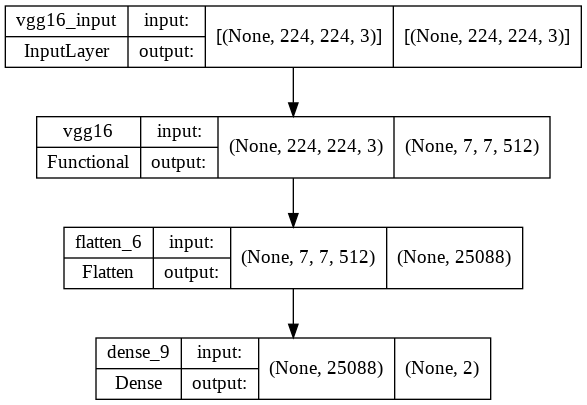

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

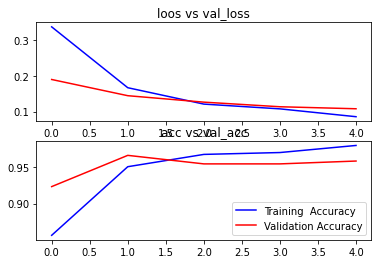

In [52]:
plot(model)

## Googlenet

In [53]:
model = google_model()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_7 (Flatten)         (None, 51200)             0         
                                                                 
 dense_10 (Dense)            (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [54]:
history = model.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 12s 87ms/step - loss: 0.0718 - acc: 0.9763 - val_loss: 0.0835 - val_acc: 0.9654
Epoch 2/5
100/100 [==============================] - 8s 75ms/step - loss: 0.0242 - acc: 0.9934 - val_loss: 0.0363 - val_acc: 0.9885
Epoch 3/5
100/100 [==============================] - 8s 75ms/step - loss: 0.0069 - acc: 0.9990 - val_loss: 0.0488 - val_acc: 0.9885
Epoch 4/5
100/100 [==============================] - 7s 74ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0515 - val_acc: 0.9846
Epoch 5/5
100/100 [==============================] - 7s 74ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0384 - val_acc: 0.9885


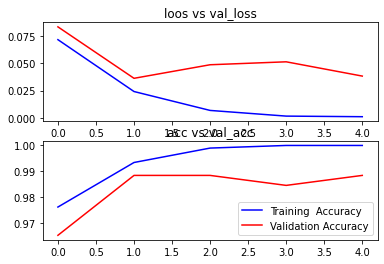

In [55]:
plot(model)

## Resnet 50

In [56]:
model = res_model()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [57]:
history = model.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 13s 100ms/step - loss: 0.5194 - acc: 0.7304 - val_loss: 0.4226 - val_acc: 0.8154
Epoch 2/5
100/100 [==============================] - 9s 92ms/step - loss: 0.4090 - acc: 0.8165 - val_loss: 0.3953 - val_acc: 0.8269
Epoch 3/5
100/100 [==============================] - 9s 93ms/step - loss: 0.3700 - acc: 0.8390 - val_loss: 0.3669 - val_acc: 0.8462
Epoch 4/5
100/100 [==============================] - 10s 96ms/step - loss: 0.3489 - acc: 0.8521 - val_loss: 0.3423 - val_acc: 0.8538
Epoch 5/5
100/100 [==============================] - 9s 92ms/step - loss: 0.3346 - acc: 0.8647 - val_loss: 0.4555 - val_acc: 0.8077


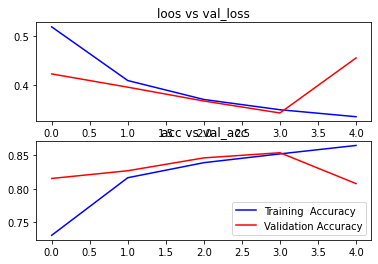

In [58]:
plot(model)

## Efficient Net

In [59]:
model = eff_model()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_9 (Flatten)         (None, 62720)             0         
                                                                 
 dense_12 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [60]:
history = model.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 14s 85ms/step - loss: 0.7616 - acc: 0.5265 - val_loss: 0.7888 - val_acc: 0.4615
Epoch 2/5
100/100 [==============================] - 7s 71ms/step - loss: 0.7237 - acc: 0.5164 - val_loss: 0.7182 - val_acc: 0.5385
Epoch 3/5
100/100 [==============================] - 7s 71ms/step - loss: 0.7492 - acc: 0.5185 - val_loss: 0.6710 - val_acc: 0.5385
Epoch 4/5
100/100 [==============================] - 7s 71ms/step - loss: 0.7189 - acc: 0.5422 - val_loss: 0.6675 - val_acc: 0.5385
Epoch 5/5
100/100 [==============================] - 7s 70ms/step - loss: 0.7084 - acc: 0.5442 - val_loss: 0.6649 - val_acc: 0.5385


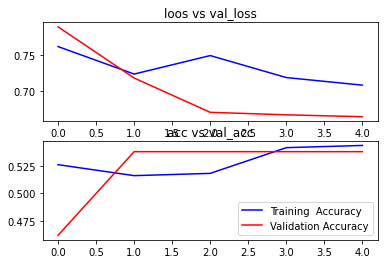

In [61]:
plot(model)

## Mobile net

In [62]:
model = mobile_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_13 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
history = model.fit(
  train_generator,
      steps_per_epoch=100,  
      epochs=5,
      validation_data=validation_generator,
      validation_batch_size=30,  
      verbose=1)

Epoch 1/5
100/100 [==============================] - 9s 72ms/step - loss: 0.0793 - acc: 0.9662 - val_loss: 0.0740 - val_acc: 0.9885
Epoch 2/5
100/100 [==============================] - 6s 64ms/step - loss: 0.0187 - acc: 0.9944 - val_loss: 0.0715 - val_acc: 0.9846
Epoch 3/5
100/100 [==============================] - 6s 64ms/step - loss: 0.0049 - acc: 0.9990 - val_loss: 0.0828 - val_acc: 0.9885
Epoch 4/5
100/100 [==============================] - 7s 68ms/step - loss: 5.5172e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9885
Epoch 5/5
100/100 [==============================] - 7s 65ms/step - loss: 3.2536e-04 - acc: 1.0000 - val_loss: 0.0929 - val_acc: 0.9885


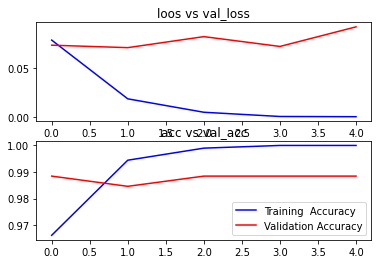

In [64]:
plot(model)